In [1]:
import os
import pandas as pd
import json
import ast
import glob
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import requests
import pprint as pp

from pandas.io.json import json_normalize

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.set_option('max_colwidth',100)

In [3]:
# elastic backup
df = pd.DataFrame.from_csv("elastic_data.csv")

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  from ipykernel import kernelapp as app


In [4]:
df['loca'] = '0'
df['loca'] = df.locationMapHierarchy.str.rsplit(pat= '>', expand=True, n=1)[1]

In [5]:
df.timestamp = pd.to_datetime(df.timestamp, unit='ms')

In [6]:
df.head()

,associated,deviceId,geoCoordinate.latitude,geoCoordinate.longitude,geoCoordinate.unit,locationCoordinate.unit,locationCoordinate.x,locationCoordinate.y,locationCoordinate.z,locationMapHierarchy,moveDistanceInFt,timestamp,loca
0,False,00:00:80:ec:c6:95,55.628977,12.644636,DEGREES,FEET,264.20850,167.16623,0.0,Kastrup>Terminal 2>T2.sal.1>T2_Floor_1_Airside,10000.00000,2018-07-13 18:51:21.532,T2_Floor_1_Airside
1,True,00:00:d5:e7:23:18,55.625684,12.657165,DEGREES,FEET,782.31366,826.51044,0.0,Kastrup>Terminal Go>TG.stue>Pier_F_Floor_0_South,99.16428,2018-07-13 16:31:23.751,Pier_F_Floor_0_South
2,True,00:00:89:5b:66:72,55.628501,12.648068,DEGREES,FEET,456.65250,711.50195,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,304.54202,2018-07-13 16:31:26.509,T3_Floor_1_Airside
3,False,00:00:70:96:1d:19,55.629072,12.649553,DEGREES,FEET,714.89496,443.42500,0.0,Kastrup>Terminal 3>T3.Stuen>T3_Floor_0_Landside_South,96.76998,2018-07-13 16:31:19.695,T3_Floor_0_Landside_South
4,True,00:00:74:89:39:9c,55.627334,12.650554,DEGREES,FEET,278.39820,259.03363,0.0,Kastrup>Finger C>F.C. sal 1>Pier_C_Floor_1_North,10000.00000,2018-07-13 19:05:37.573,Pier_C_Floor_1_North


# Some exploration stuff

In [7]:
print(len(df.deviceId.unique()))
print(len(df))

326359
6955237


Text(0.5,1,'Number of Number of Notifications in a Day')

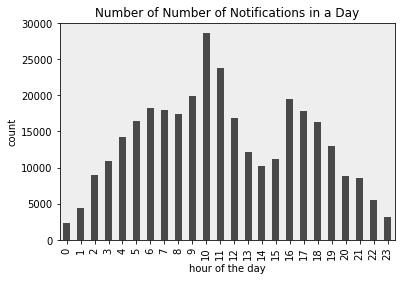

In [8]:
ax = df.drop_duplicates('deviceId').groupby(df.drop_duplicates('deviceId').timestamp.dt.hour).loca.count().plot(kind='bar',
                                                                                                               color='#494949')

ax.set_facecolor('#eeeeee')
ax.set_xlabel('hour of the day')
ax.set_ylabel('count')
ax.set_title('Number of Number of Notifications in a Day')

In [9]:
print(df.loca.unique())

['T2_Floor_1_Airside' 'Pier_F_Floor_0_South' 'T3_Floor_1_Airside'
 'T3_Floor_0_Landside_South' 'Pier_C_Floor_1_North' 'F.D.sal.1'
 'T2_Floor_0_Landside_Center' 'Pier_W_Floor_1'
 'T3_Floor_0_Baggage_Reclaim' 'T3_Floor_1_CSC' 'T2_Floor_0_Landside_East'
 'TG.stue' 'T3_Floor_1_Nytorv' 'Pier_D_Floor_2_Pier_D'
 'T2_Floor_0_Landside_West' 'F.A sal 1' 'T1.Stuen' 'Pier_C_Floor_1_South'
 'Pier_A_Floor_1_North' 'T3_Floor_1_Taxfree' 'T3_Floor_0_Landside_North'
 'Pier_A_Floor_1_South' 'Pier_D_Floor_1_Pier_D' 'T2_Floor_1_Landside'
 'T3.sal.4' 'T3.Stuen' 'F.C. sal 1' 'T3.sal.1' 'T2.sal.2' 'T3.sal.3'
 'Pier_C_Floor_0_North' 'T1_Floor_0_West' 'T2_Floor_0_BF2' 'T3.sal.2'
 'T2.sal.1' 'F.C.sal.2' 'F.V.sal.1' 'F.B.Stuen' 'T2.Stuen'
 'Pier_F_Floor_1_North' 'F.C sal 3' 'F.D.sal.2' 'F.C.Stuen'
 'T1_Floor_0_Center' 'F.V.-Stuen' 'T1.sal.1-forbindelses finger'
 'T1_Floor_1_East' 'Pier_B_Floor_1_North' 'T2.kld.1' 'F.B. sal 1'
 'Pier_B_Floor_1_South' 'T3.kld.1' 'Pier_C_Floor_2_North'
 'Pier_C_Floor_2_South' 'Finge

In [10]:
assoc = df[df.associated == True].copy()

In [16]:
print(len(df))
len(assoc)

6955237


2510772

In [17]:
assoc.head()

,associated,deviceId,geoCoordinate.latitude,geoCoordinate.longitude,geoCoordinate.unit,locationCoordinate.unit,locationCoordinate.x,locationCoordinate.y,locationCoordinate.z,locationMapHierarchy,moveDistanceInFt,timestamp,loca
1,True,00:00:d5:e7:23:18,55.625684,12.657165,DEGREES,FEET,782.31366,826.51044,0.0,Kastrup>Terminal Go>TG.stue>Pier_F_Floor_0_South,99.16428,2018-07-13 16:31:23.751,Pier_F_Floor_0_South
2,True,00:00:89:5b:66:72,55.628501,12.648068,DEGREES,FEET,456.65250,711.50195,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,304.54202,2018-07-13 16:31:26.509,T3_Floor_1_Airside
4,True,00:00:74:89:39:9c,55.627334,12.650554,DEGREES,FEET,278.39820,259.03363,0.0,Kastrup>Finger C>F.C. sal 1>Pier_C_Floor_1_North,10000.00000,2018-07-13 19:05:37.573,Pier_C_Floor_1_North
8,True,00:00:18:1c:b4:78,55.629111,12.645467,DEGREES,FEET,440.59836,102.59693,0.0,Kastrup>Terminal 2>T2.Stuen>T2_Floor_0_Landside_Center,10000.00000,2018-07-13 16:31:17.689,T2_Floor_0_Landside_Center
9,True,00:00:c5:d3:11:5f,55.628774,12.643149,DEGREES,FEET,1188.76170,176.76640,0.0,Kastrup>Finger Vest>F.V.sal.1>Pier_W_Floor_1,268.66763,2018-07-13 19:05:37.570,Pier_W_Floor_1


In [18]:
#np.sort(assoc.locHie.unique())

## File Structure Plan

#### device ID > List of { timestamp : [ Zone , x , y, long, lat, confidience ] }
#### device ID > First_seen
#### device ID > Last_seen
#### device ID > username

##### Might have to add anything else as it comes up

In [19]:
assoc = assoc.set_index(['deviceId'])

In [20]:
assoc['id'] = assoc.index
assoc = assoc.sort_values(['id', 'timestamp'])

In [21]:
assoc.head()

,associated,geoCoordinate.latitude,geoCoordinate.longitude,geoCoordinate.unit,locationCoordinate.unit,locationCoordinate.x,locationCoordinate.y,locationCoordinate.z,locationMapHierarchy,moveDistanceInFt,timestamp,loca,id
deviceId,,,,,,,,,,,,,
00:00:00:00:b0:ae,True,55.628430,12.648428,DEGREES,FEET,534.90936,721.98114,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,45.250965,2018-07-15 20:16:38.505,T3_Floor_1_Airside,00:00:00:00:b0:ae
00:00:00:00:b0:ae,True,55.628313,12.648757,DEGREES,FEET,610.18604,749.87024,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,80.276890,2018-07-15 20:16:45.701,T3_Floor_1_Airside,00:00:00:00:b0:ae
00:00:00:00:b0:ae,True,55.628372,12.648516,DEGREES,FEET,556.95105,738.95060,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,54.343370,2018-07-15 20:16:49.925,T3_Floor_1_Airside,00:00:00:00:b0:ae
00:00:00:00:b0:ae,True,55.628405,12.647805,DEGREES,FEET,410.71942,756.84650,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,147.322620,2018-07-15 20:17:11.979,T3_Floor_1_Airside,00:00:00:00:b0:ae
00:00:00:00:b0:ae,True,55.628287,12.649222,DEGREES,FEET,706.13416,739.62630,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,295.916230,2018-07-15 20:17:14.396,T3_Floor_1_Airside,00:00:00:00:b0:ae


## Calculates time spent in each zone, I dont think we need ot run this anymore

In [22]:
# calculates time spent in each zone

temp = list(zip(assoc.loca.tolist() , pd.to_datetime(assoc.timestamp.tolist())))

#create a null time delta object
zero = pd.Timedelta('0 days')

new_col = []
counter = zero

for i in range(1,len(temp)):
    pre = temp[i-1]
    curr = temp[i]
    
    # checking for cases
    if pre[0] == curr[0]:
        #if not changed zones, just ignore with zero
        counter = counter + (curr[1] - pre[1])
        new_col.append(zero)
        
    elif i == (len(temp)-1):
        #if last one dump counter
        new_col.append(counter)
        
    elif (pre[0] != curr[0]) & (curr[0] != temp[i+1][0]):
        # if rapidly swithcing between zones also dump counter
        new_col.append(counter)
        counter = (curr[1] - pre[1])
    else:
        # if last one dump counter
        new_col.append(counter)
        counter = zero

new_col.append(zero)
assoc['timespent'] = new_col

In [23]:
assoc[(assoc.id == '00:00:01:dc:db:72') & (assoc.timespent != pd.Timedelta('0 days'))][['loca', 'timestamp', 'timespent']]


,loca,timestamp,timespent
deviceId,,,


In [24]:
assoc.head(100)

,associated,geoCoordinate.latitude,geoCoordinate.longitude,geoCoordinate.unit,locationCoordinate.unit,locationCoordinate.x,locationCoordinate.y,locationCoordinate.z,locationMapHierarchy,moveDistanceInFt,timestamp,loca,id,timespent
deviceId,,,,,,,,,,,,,,
00:00:00:00:b0:ae,True,55.628430,12.648428,DEGREES,FEET,534.909360,721.981140,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,45.250965,2018-07-15 20:16:38.505,T3_Floor_1_Airside,00:00:00:00:b0:ae,0 days 00:00:00
00:00:00:00:b0:ae,True,55.628313,12.648757,DEGREES,FEET,610.186040,749.870240,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,80.276890,2018-07-15 20:16:45.701,T3_Floor_1_Airside,00:00:00:00:b0:ae,0 days 00:00:00
00:00:00:00:b0:ae,True,55.628372,12.648516,DEGREES,FEET,556.951050,738.950600,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,54.343370,2018-07-15 20:16:49.925,T3_Floor_1_Airside,00:00:00:00:b0:ae,0 days 00:00:00
00:00:00:00:b0:ae,True,55.628405,12.647805,DEGREES,FEET,410.719420,756.846500,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,147.322620,2018-07-15 20:17:11.979,T3_Floor_1_Airside,00:00:00:00:b0:ae,0 days 00:00:00
00:00:00:00:b0:ae,True,55.628287,12.649222,DEGREES,FEET,706.134160,739.626300,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,295.916230,2018-07-15 20:17:14.396,T3_Floor_1_Airside,00:00:00:00:b0:ae,0 days 00:00:00
00:00:00:00:b0:ae,True,55.628414,12.648951,DEGREES,FEET,641.829400,705.733030,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,72.690120,2018-07-15 20:17:26.563,T3_Floor_1_Airside,00:00:00:00:b0:ae,0 days 00:00:00
00:00:00:00:b0:ae,True,55.628258,12.649016,DEGREES,FEET,666.563350,758.475000,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,58.253593,2018-07-15 20:17:36.404,T3_Floor_1_Airside,00:00:00:00:b0:ae,0 days 00:00:00
00:00:00:00:b0:ae,True,55.628115,12.650025,DEGREES,FEET,881.415040,767.439500,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,215.038620,2018-07-15 20:17:46.420,T3_Floor_1_Airside,00:00:00:00:b0:ae,0 days 00:01:07.915000
00:00:00:02:da:c4,True,55.628901,12.646329,DEGREES,FEET,75.402270,639.363830,0.0,Kastrup>Terminal 3>T3.Stuen>T2_Floor_0_Landside_East,10000.000000,2018-07-13 16:31:55.740,T2_Floor_0_Landside_East,00:00:00:02:da:c4,-3 days +20:14:09.320000


In [25]:
# Function which splits lists of date time to smaller lists
# if time in between values is larger than 1 day
# if it is more than one day I am assuming that they have left

def date_segments(dates):
    output = []
    cur_list = [dates[0]]
    for dt_pair in zip(dates[1:], dates):
        if (dt_pair[0] - dt_pair[1]).days > 1:
            output.append(cur_list)
            cur_list = [dt_pair[0]]
        else:
            cur_list.append(dt_pair[0])
    output.append(cur_list)
    return output

In [26]:
# removes values if they are adjacent i.e. if they have not moved
# from a zone

def remove_adj(nums):
    return [a for a,b in 
            zip(nums, nums[1:]+[not nums[-1]]) if a != b]

In [27]:
#date_segments(pd.to_datetime(pd.Series(time_list)))

In [28]:
zone_transfers = {}

starting_times = []
paths = []
spent_in_zone = []
ids = []
left = []

count = 0
total = len(assoc.index.unique())

for key in assoc.index.unique():
    subdf = assoc[assoc.id == key]
    times = subdf.timestamp.tolist()
    spent = subdf[subdf.timespent != pd.Timedelta('0 days')].timespent
    
    
    
    # differienate between differnet visits
    all_visits = date_segments(pd.to_datetime(pd.Series(times)))
    
    num_visits = 0
    
    for visit in all_visits:
        num_visits = num_visits + 1
        #if user is staff ( stayed for 4+ hours per visit)
        if (max(visit) - min(visit)).days > (4/24):
            #ignore person
            continue
        
        
        
        path = []
        spending = []
        for i in range(len(visit)):
            path.append(
                subdf[subdf.timestamp == visit[i]].loca[0])
            spending.append(
                subdf[subdf.timestamp == visit[i]].timespent[0])
        
        spending = pd.DataFrame(spending, columns=["timespent"])
        spent = spending[spending.timespent != pd.Timedelta('0 days')].timespent.tolist()
        
        ids.append(key + '-' + str(num_visits))
        spent_in_zone.append(spent)
        starting_times.append(visit[0])
        left.append(visit[-1])
        paths.append(remove_adj(path))
        
        #zone_transfers[key + str(num_visits)] = list(zip(remove_adj(path) , spent))
        count = count + 1
    if (count%100) == 0:
        print(str(count) + ' out off ' + str(total) + ' ids')
print("done!")

100 out off 56147 ids
200 out off 56147 ids
300 out off 56147 ids
400 out off 56147 ids
500 out off 56147 ids
600 out off 56147 ids
700 out off 56147 ids
800 out off 56147 ids
900 out off 56147 ids
1000 out off 56147 ids
1100 out off 56147 ids
1200 out off 56147 ids
1300 out off 56147 ids
1400 out off 56147 ids
1500 out off 56147 ids
1600 out off 56147 ids
1700 out off 56147 ids
1800 out off 56147 ids
1900 out off 56147 ids
2000 out off 56147 ids
2100 out off 56147 ids
2200 out off 56147 ids
2300 out off 56147 ids
2300 out off 56147 ids
2400 out off 56147 ids
2500 out off 56147 ids
2600 out off 56147 ids
2700 out off 56147 ids
2800 out off 56147 ids
2900 out off 56147 ids
3000 out off 56147 ids
3100 out off 56147 ids
3200 out off 56147 ids
3300 out off 56147 ids
3300 out off 56147 ids
3400 out off 56147 ids
3500 out off 56147 ids
3600 out off 56147 ids
3700 out off 56147 ids
3800 out off 56147 ids
3900 out off 56147 ids
4000 out off 56147 ids
4100 out off 56147 ids
4200 out off 56147 i

33000 out off 56147 ids
33100 out off 56147 ids
33200 out off 56147 ids
33300 out off 56147 ids
33500 out off 56147 ids
33600 out off 56147 ids
33700 out off 56147 ids
33800 out off 56147 ids
33900 out off 56147 ids
34000 out off 56147 ids
34100 out off 56147 ids
34200 out off 56147 ids
34300 out off 56147 ids
34400 out off 56147 ids
34500 out off 56147 ids
34600 out off 56147 ids
34700 out off 56147 ids
34800 out off 56147 ids
34900 out off 56147 ids
35000 out off 56147 ids
35100 out off 56147 ids
35200 out off 56147 ids
35300 out off 56147 ids
35400 out off 56147 ids
35500 out off 56147 ids
35600 out off 56147 ids
35700 out off 56147 ids
35800 out off 56147 ids
35900 out off 56147 ids
36000 out off 56147 ids
36100 out off 56147 ids
36200 out off 56147 ids
36300 out off 56147 ids
36400 out off 56147 ids
36500 out off 56147 ids
36600 out off 56147 ids
36700 out off 56147 ids
36800 out off 56147 ids
36900 out off 56147 ids
37000 out off 56147 ids
37100 out off 56147 ids
37200 out off 56

In [29]:
# intialize the zonezone pairs
zone_pair = {}
for zone1 in assoc.loca.unique().tolist():
    zone_pair[zone1] = {}
    for zone2 in assoc.loca.unique().tolist():
        zone_pair[zone1][zone2] = 0

In [30]:


for value in zone_transfers.values():
    if len(value) == 0:
        paths.append(['na'])
        spent_in_zone.append([pd.Timedelta('0 days')])
        continue
    path, time = zip(*value)

    for i in range(1, len(path)):
        zone_pair[path[i-1][0]][path[i][0]] = 1 + zone_pair[path[i-1][0]][path[i][0]]



## Adjcency Matrix for movements from zone to zone

In [31]:
# pd.DataFrame(zone_pair)

In [32]:
print(len(spent_in_zone))
print(len(paths))
print(len(starting_times))
print(len(ids))

54952
54952
54952
54952


In [33]:
visits = pd.DataFrame(list(zone_transfers.keys()))
visits['arrive'] = starting_times
visits['path'] = paths
visits['spent'] = spent_in_zone
visits['id'] = ids
visits['left'] = left

visits.head()

,arrive,path,spent,id,left
0,2018-07-15 20:16:38.505,[T3_Floor_1_Airside],[0 days 00:01:07.915000],00:00:00:00:b0:ae-1,2018-07-15 20:17:46.420
1,2018-07-13 16:31:55.740,"[T2_Floor_0_Landside_East, T2_Floor_1_Landside, T2_Floor_0_Landside_East, T3_Floor_1_CSC, T2_Flo...","[-3 days +20:14:09.320000, 0 days 00:04:13.411000, 0 days 00:02:04.636000, 0 days 00:03:28.70500...",00:00:00:02:da:c4-1,2018-07-13 18:24:44.647
2,2018-07-14 04:26:16.814,"[T3_Floor_0_Landside_South, T3_Floor_1_Airside, T3_Floor_0_Landside_South, T3_Floor_1_Airside, T...","[0 days 00:07:24.006000, 0 days 00:00:14.397000, 0 days 00:00:06.885000, 0 days 00:01:24.087000,...",00:00:00:02:e8:8b-1,2018-07-14 06:10:53.102
3,2018-07-13 18:13:17.363,"[T3.sal.1, T3_Floor_1_Airside, T3.sal.1, T3_Floor_1_Airside, T3.sal.1, T3_Floor_1_Airside, T3.sa...","[-1 days +12:02:24.261000, 0 days 00:01:07.276000, 0 days 00:04:19.233000, 0 days 00:09:38.70900...",00:00:00:03:3a:04-1,2018-07-13 20:57:38.414
4,2018-07-16 11:30:52.619,"[Pier_C_Floor_2_South, Pier_C_Floor_2_North, T3_Floor_0_Baggage_Reclaim, T3_Floor_1_Airside, T3....","[2 days 14:33:14.205000, 0 days 00:11:15.119000, 0 days 00:07:19.651000, 0 days 00:00:56.825000,...",00:00:00:04:6a:fe-1,2018-07-16 12:01:32.202


In [34]:
def start_from(lis):
    return lis[0]

def finished_at(lis):
    return lis[-1]

def catergorize(row):
    
    row['type'] = 'na'
    
    if ("Pier" in row['start']):
        if ("Pier" in row['fin']):
            row['type'] = 'transit'
        elif ("Pier" not in row['fin']):
            row['type'] = 'arrival'
    else:
        if ("Pier" in row['fin']):
            row['type'] = 'departure'
        elif ("Pier" not in row['fin']):
            row['type'] = 'greeter'
    return row



In [35]:
def fix_spent(lis):
    lis = list(lis)
    
    if len(lis) == 0:
        lis = [pd.Timedelta('0 days')]
    else:
        lis[0] = pd.Timedelta('0 days')
    return lis

def find_total_time(lis):
#     print(lis)
#     deltas = map(pd.Timedelta, lis)
    count = pd.Timedelta('0 days')
    for delta in lis: # deltas:
        count = count + delta
    return count

In [36]:
visits['spent'] = visits['spent'].apply(fix_spent)
visits['total_spent'] = visits['spent'].apply(find_total_time)
visits['start'] = visits['path'].apply(start_from)
visits['fin'] = visits['path'].apply(finished_at)



In [37]:
visits = visits.apply(catergorize,axis=1)

In [54]:
visits.head(5)

,arrive,path,spent,id,left,total_spent,start,fin,type
1,2018-07-13 16:31:55.740,"[T2_Floor_0_Landside_East, T2_Floor_1_Landside, T2_Floor_0_Landside_East, T3_Floor_1_CSC, T2_Flo...","[0 days 00:00:00, 0 days 00:04:13.411000, 0 days 00:02:04.636000, 0 days 00:03:28.705000, 0 days...",00:00:00:02:da:c4-1,2018-07-13 18:24:44.647,01:38:26.073000,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,departure
2,2018-07-14 04:26:16.814,"[T3_Floor_0_Landside_South, T3_Floor_1_Airside, T3_Floor_0_Landside_South, T3_Floor_1_Airside, T...","[0 days 00:00:00, 0 days 00:00:14.397000, 0 days 00:00:06.885000, 0 days 00:01:24.087000, 0 days...",00:00:00:02:e8:8b-1,2018-07-14 06:10:53.102,01:00:16.529000,T3_Floor_0_Landside_South,Pier_C_Floor_0_North,departure
3,2018-07-13 18:13:17.363,"[T3.sal.1, T3_Floor_1_Airside, T3.sal.1, T3_Floor_1_Airside, T3.sal.1, T3_Floor_1_Airside, T3.sa...","[0 days 00:00:00, 0 days 00:01:07.276000, 0 days 00:04:19.233000, 0 days 00:09:38.709000, 0 days...",00:00:00:03:3a:04-1,2018-07-13 20:57:38.414,02:12:48.129000,T3.sal.1,TG.stue,greeter
4,2018-07-16 11:30:52.619,"[Pier_C_Floor_2_South, Pier_C_Floor_2_North, T3_Floor_0_Baggage_Reclaim, T3_Floor_1_Airside, T3....","[0 days 00:00:00, 0 days 00:11:15.119000, 0 days 00:07:19.651000, 0 days 00:00:56.825000, 0 days...",00:00:00:04:6a:fe-1,2018-07-16 12:01:32.202,00:23:29.820000,Pier_C_Floor_2_South,T2_Floor_0_Landside_Center,arrival
6,2018-07-14 12:31:39.908,"[T3_Floor_1_Airside, T3_Floor_0_Landside_South, T2_Floor_1_Landside, T2_Floor_0_Landside_Center,...","[0 days 00:00:00, 0 days 00:08:33.810000, 0 days 00:08:05.141000, 0 days 00:00:02.196000, 0 days...",00:00:00:09:8a:a9-1,2018-07-14 14:07:58.059,01:28:31.644000,T3_Floor_1_Airside,T2_Floor_1_Airside,greeter


In [202]:
visits.loc[0].path

['T2_Floor_0_Landside_East',
 'T2_Floor_1_Landside',
 'T2_Floor_0_Landside_East',
 'T3_Floor_1_CSC',
 'T2_Floor_1_Landside',
 'T3.sal.1',
 'T3_Floor_0_Baggage_Reclaim',
 'T3_Floor_1_Nytorv',
 'T3_Floor_1_Airside',
 'Pier_D_Floor_1_Pier_D',
 'T3_Floor_1_Airside',
 'Pier_D_Floor_2_Pier_D',
 'T3_Floor_1_Airside',
 'T3_Floor_0_Landside_North',
 'T3_Floor_1_Airside',
 'T3.sal.1',
 'T3_Floor_1_Nytorv',
 'T3_Floor_1_Taxfree',
 'T3_Floor_1_Nytorv',
 'T2.sal.2',
 'T2_Floor_1_Airside',
 'T3_Floor_1_Airside',
 'Pier_C_Floor_1_North',
 'T3_Floor_1_Airside',
 'Pier_C_Floor_1_North',
 'Pier_C_Floor_1_South',
 'F.C. sal 1',
 'Pier_C_Floor_1_South',
 'F.C. sal 1',
 'Pier_C_Floor_1_South',
 'F.C. sal 1',
 'Pier_C_Floor_1_South',
 'Pier_C_Floor_1_North']

Text(0.5,1,'split of passenger types')

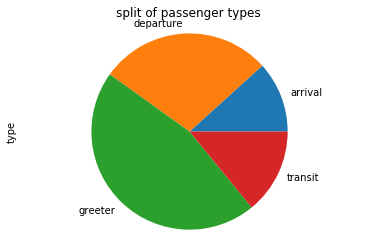

In [39]:
# Greeters and Transists are Inflated, as pax who do nothave starting/ending points in a pier would be greeter
# and a single notification from a Pier would mean that they are catergorized as transit

ax = visits.groupby('type')["type"].count().plot(kind='pie')

ax.axis('equal')
ax.set_title('split of passenger types')

Text(0.5,1,'split of passenger types')

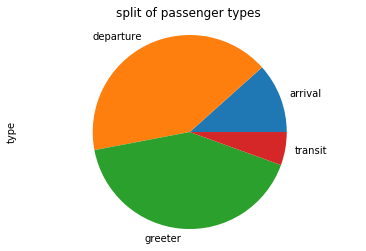

In [40]:
ax = visits[(visits.path.map(len) > 10)].groupby('type').type.count().plot(kind='pie')

ax.axis('equal')
ax.set_title('split of passenger types')

In [41]:
visits = visits[(visits.path.map(len) > 10)]

In [ ]:
visits.to_csv("visits_backup.csv")

In [11]:
visits = pd.read_csv("visits_backup.csv")

In [12]:
import ast

In [13]:
def fix_timedelta_import(lis):
    return ast.literal_eval(lis.replace("Timedelta(" , '').replace(")",''))

def convert_listed_timedeltas(lis):
    out = []
    for string in lis:
            out.append(pd.Timedelta(string))
    return out

## Catergorizing ids with their types based on their paths

In [14]:
visits.path = visits.path.map(ast.literal_eval)
visits.spent = visits.spent.map(fix_timedelta_import)
visits.spent = visits.spent.map(convert_listed_timedeltas)
visits.total_spent = visits.total_spent.map(pd.Timedelta)

In [15]:
visits.head(2)

,Unnamed: 0,arrive,path,spent,id,left,total_spent,start,fin,type
0,1,2018-07-13 16:31:55.740,"[T2_Floor_0_Landside_East, T2_Floor_1_Landside, T2_Floor_0_Landside_East, T3_Floor_1_CSC, T2_Flo...","[0 days 00:00:00, 0 days 00:04:13.411000, 0 days 00:02:04.636000, 0 days 00:03:28.705000, 0 days...",00:00:00:02:da:c4-1,2018-07-13 18:24:44.647,01:38:26.073000,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,departure
1,2,2018-07-14 04:26:16.814,"[T3_Floor_0_Landside_South, T3_Floor_1_Airside, T3_Floor_0_Landside_South, T3_Floor_1_Airside, T...","[0 days 00:00:00, 0 days 00:00:14.397000, 0 days 00:00:06.885000, 0 days 00:01:24.087000, 0 days...",00:00:00:02:e8:8b-1,2018-07-14 06:10:53.102,01:00:16.529000,T3_Floor_0_Landside_South,Pier_C_Floor_0_North,departure


In [65]:
print(visits.start.value_counts()[:9])
print('_'*40)
print(visits.fin.value_counts()[:9])

T3_Floor_1_Airside            3405
T2_Floor_0_Landside_East      1924
T3_Floor_0_Landside_South     1846
T2_Floor_1_Airside            1797
T2_Floor_0_Landside_West      1563
T3.sal.1                      1426
T2_Floor_1_Landside           1247
T3_Floor_1_Nytorv             1196
T2_Floor_0_Landside_Center    1163
Name: start, dtype: int64
________________________________________
Pier_C_Floor_1_South         2774
T3_Floor_0_Landside_North    2446
Pier_A_Floor_1_South         1947
Pier_F_Floor_0_South         1825
F.C. sal 1                   1568
Pier_C_Floor_1_North         1321
Pier_W_Floor_1               1262
T3.Stuen                     1183
T2_Floor_1_Airside           1147
Name: fin, dtype: int64


### Some plots I guess

In [66]:
def get_mins(td):
    return td.seconds/60

Text(0.5,1,'dist of time people spend in airport')

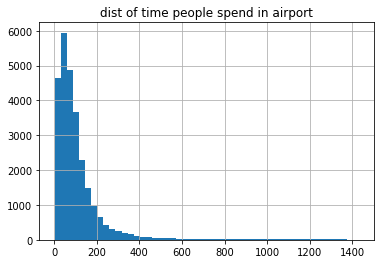

In [67]:
ax = (visits.total_spent.apply(get_mins)).hist(bins=50)
ax.set_title("dist of time people spend in airport")

(0, 0.07)

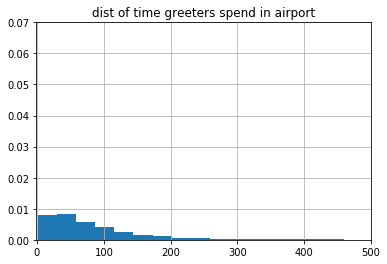

In [68]:
typ = 'greeter'

ax = (visits[visits.type == typ].total_spent.apply(
    get_mins)).hist(bins=50 , density = True)
ax.set_title("dist of time {}s spend in airport".format(typ))
plt.xlim([-1, 500])
plt.ylim([0,0.07])

(0, 0.07)

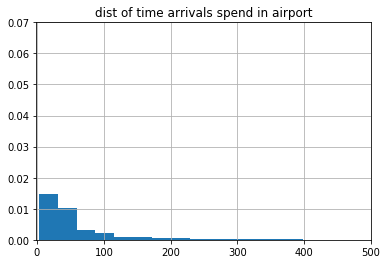

In [69]:
typ = 'arrival'

ax = (visits[visits.type == typ].total_spent.apply(
    get_mins)).hist(bins=50 , density = True)
ax.set_title("dist of time {}s spend in airport".format(typ))
plt.xlim([-1, 500])
plt.ylim([0,0.07])

(0, 0.07)

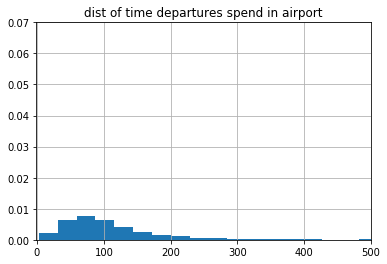

In [70]:
typ = 'departure'
ax = (visits[visits.type == typ].total_spent.apply(
    get_mins)).hist(bins=50 , density = True)
ax.set_title("dist of time {}s spend in airport".format(typ))
plt.xlim([-1, 500])
plt.ylim([0,0.07])

(0, 0.07)

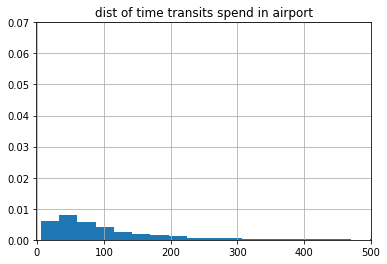

In [71]:
typ = 'transit'

ax = (visits[visits.type == typ].total_spent.apply(
    get_mins)).hist(bins=50 , density = True)
ax.set_title("dist of time {}s spend in airport".format(typ))
plt.xlim([-1, 500])
plt.ylim([0,0.07])

### looking at arrival passengers time spending habits

make function that finds out the average time spent in each zone of an input dataframe

# Math might be wrong

In [50]:
starting_times = []
paths = []
timestamp = []
ids = []
time_since = []
type = []

total = len(assoc.index.unique())
count = 0

for key in assoc.index.unique():
    
    if (count%100) == 0 :
        print(str(count) + ' out of ' + str(total))
        
    count = count + 1
    
    subdf = assoc[assoc.id == key]
    times = subdf.timestamp.tolist()
    
    # differienate between differnet visits
    all_visits = date_segments(pd.to_datetime(pd.Series(times)))
    
    num_visits = 0
    for visit in all_visits:
        
        num_visits = num_visits + 1
        #if user is staff ( stayed for 4+ hours per visit)
        if (max(visit) - min(visit)).days > (4/24):
            #ignore person
            continue
        
        path = []
        since = []
        
        for i in range(len(visit)):
            #lat then long eg [lat, long]
            path.append(
                subdf[subdf.timestamp == visit[i]][['geoCoordinate.latitude', 
                                                    'geoCoordinate.longitude']].iloc[0].tolist()
            )
            # time since appearing
            since.append(
                (visit[i] - visit[0])
            )

        ids.append(key + '-' + str(num_visits))
        starting_times.append(visit[0])
        paths.append(path)
        timestamp.append(visit)
        time_since.append(since)
        
print("done!")

0 out of 56147
100 out of 56147
200 out of 56147
300 out of 56147
400 out of 56147
500 out of 56147
600 out of 56147
700 out of 56147
800 out of 56147
900 out of 56147
1000 out of 56147
1100 out of 56147
1200 out of 56147
1300 out of 56147
1400 out of 56147
1500 out of 56147
1600 out of 56147
1700 out of 56147
1800 out of 56147
1900 out of 56147
2000 out of 56147
2100 out of 56147
2200 out of 56147
2300 out of 56147
2400 out of 56147
2500 out of 56147
2600 out of 56147
2700 out of 56147
2800 out of 56147
2900 out of 56147
3000 out of 56147
3100 out of 56147
3200 out of 56147
3300 out of 56147
3400 out of 56147
3500 out of 56147
3600 out of 56147
3700 out of 56147
3800 out of 56147
3900 out of 56147
4000 out of 56147
4100 out of 56147
4200 out of 56147
4300 out of 56147
4400 out of 56147
4500 out of 56147
4600 out of 56147
4700 out of 56147
4800 out of 56147
4900 out of 56147
5000 out of 56147
5100 out of 56147
5200 out of 56147
5300 out of 56147
5400 out of 56147
5500 out of 56147
5600

43800 out of 56147
43900 out of 56147
44000 out of 56147
44100 out of 56147
44200 out of 56147
44300 out of 56147
44400 out of 56147
44500 out of 56147
44600 out of 56147
44700 out of 56147
44800 out of 56147
44900 out of 56147
45000 out of 56147
45100 out of 56147
45200 out of 56147
45300 out of 56147
45400 out of 56147
45500 out of 56147
45600 out of 56147
45700 out of 56147
45800 out of 56147
45900 out of 56147
46000 out of 56147
46100 out of 56147
46200 out of 56147
46300 out of 56147
46400 out of 56147
46500 out of 56147
46600 out of 56147
46700 out of 56147
46800 out of 56147
46900 out of 56147
47000 out of 56147
47100 out of 56147
47200 out of 56147
47300 out of 56147
47400 out of 56147
47500 out of 56147
47600 out of 56147
47700 out of 56147
47800 out of 56147
47900 out of 56147
48000 out of 56147
48100 out of 56147
48200 out of 56147
48300 out of 56147
48400 out of 56147
48500 out of 56147
48600 out of 56147
48700 out of 56147
48800 out of 56147
48900 out of 56147
49000 out of

In [72]:
geo = pd.DataFrame(list(zone_transfers.keys()))
geo['arrive'] = starting_times
geo['path'] = paths
geo['time'] = timestamp
geo['since'] = time_since
geo['id'] = ids

geo.head()

NameError: name 'zone_transfers' is not defined

In [53]:
geo.to_csv("geo_backup.csv")

In [6]:
#geo = pd.read_csv("geo_backup.csv")

In [83]:
def fix_timestamp_import(lis):
    return ast.literal_eval(lis.replace("Timestamp(" , '').replace(")",''))

def convert_listed_timestamps(lis):
    out = []
    for string in lis:
            out.append(pd.Timestamp(string))
    return out

In [95]:
#geo.path = geo.path.map(ast.literal_eval)
#geo.time = geo.time.map(fix_timestamp_import).map(convert_listed_timestamps)
#geo.since = geo.since.map(fix_timedelta_import).map(convert_listed_timedeltas)
#geo.arrive = geo.arrive.map(pd.Timestamp)

In [96]:
geo.head()

,Unnamed: 0,arrive,path,time,since,id
0,0,2018-07-15 20:16:38.505,"[[55.62842956347519, 12.648428046553116], [55.62831282996292, 12.648757303135556], [55.628371778...","[2018-07-15 20:16:38.505000, 2018-07-15 20:16:45.701000, 2018-07-15 20:16:49.925000, 2018-07-15 ...","[0 days 00:00:00, 0 days 00:00:07.196000, 0 days 00:00:11.420000, 0 days 00:00:33.474000, 0 days...",00:00:00:00:b0:ae-1
1,1,2018-07-13 16:31:55.740,"[[55.62890072563577, 12.646329436646196], [55.629052231592226, 12.645924802187375], [55.62874056...","[2018-07-13 16:31:55.740000, 2018-07-13 16:36:09.151000, 2018-07-13 16:38:13.787000, 2018-07-13 ...","[0 days 00:00:00, 0 days 00:04:13.411000, 0 days 00:06:18.047000, 0 days 00:09:46.752000, 0 days...",00:00:00:02:da:c4-1
2,2,2018-07-14 04:26:16.814,"[[55.62924457773722, 12.649677079342391], [55.629247709656134, 12.649137369665484], [55.62930480...","[2018-07-14 04:26:16.814000, 2018-07-14 04:27:21.065000, 2018-07-14 04:31:50.150000, 2018-07-14 ...","[0 days 00:00:00, 0 days 00:01:04.251000, 0 days 00:05:33.336000, 0 days 00:05:57.864000, 0 days...",00:00:00:02:e8:8b-1
3,3,2018-07-13 18:13:17.363,"[[55.628241159183894, 12.650460679024684], [55.62830752536006, 12.650270981203215], [55.62814184...","[2018-07-13 18:13:17.363000, 2018-07-13 18:14:39.262000, 2018-07-13 18:15:46.538000, 2018-07-13 ...","[0 days 00:00:00, 0 days 00:01:21.899000, 0 days 00:02:29.175000, 0 days 00:06:48.408000, 0 days...",00:00:00:03:3a:04-1
4,4,2018-07-16 11:30:52.619,"[[55.62629170711868, 12.649684094333107], [55.626498436279796, 12.649774634176008], [55.62690941...","[2018-07-16 11:30:52.619000, 2018-07-16 11:33:42.557000, 2018-07-16 11:35:03.343000, 2018-07-16 ...","[0 days 00:00:00, 0 days 00:02:49.938000, 0 days 00:04:10.724000, 0 days 00:14:05.057000, 0 days...",00:00:00:04:6a:fe-1


## This dataset is good for stroeing the data and would prove to ber very flexible, first lets make a heat map on tabelau. 

So we need to break open this dataset into two, to reduce size. one of ID and arrival time, and another with ID and location time and sinze.

In [100]:
all_points = []
tot = len(geo.id.unique())
count = 0
for key in geo.id.unique():
    subdf = geo[geo.id == key]
    
    if (count%1000) == 0 :
        print(str(count) + " out of " + str(tot))
    
    
    count = count + 1
    
    for i in range(len(subdf.path.iloc[0])):
        point = {}
        
        point['id'] = key

        point['lat'] = subdf.path.iloc[0][i][0]
        point['long'] = subdf.path.iloc[0][i][1]
        point['timestamp'] = subdf.time.iloc[0][i]
        point['since'] = subdf.since.iloc[0][i]
        
        if subdf.since.iloc[0][-1] != pd.Timedelta('0 days'):
            point['progress'] = subdf.since.iloc[0][i] / subdf.since.iloc[0][-1]
        else:
            point['progress'] = "Na"
        
        
        all_points.append(point)
        
geo_visits = pd.DataFrame(all_points)
print("done!")

0 out of 54952
1000 out of 54952
2000 out of 54952
3000 out of 54952
4000 out of 54952
5000 out of 54952
6000 out of 54952
7000 out of 54952
8000 out of 54952
9000 out of 54952
10000 out of 54952
11000 out of 54952
12000 out of 54952
13000 out of 54952
14000 out of 54952
15000 out of 54952
16000 out of 54952
17000 out of 54952
18000 out of 54952
19000 out of 54952
20000 out of 54952
21000 out of 54952
22000 out of 54952
23000 out of 54952
24000 out of 54952
25000 out of 54952
26000 out of 54952
27000 out of 54952
28000 out of 54952
29000 out of 54952
30000 out of 54952
31000 out of 54952
32000 out of 54952
33000 out of 54952
34000 out of 54952
35000 out of 54952
36000 out of 54952
37000 out of 54952
38000 out of 54952
39000 out of 54952
40000 out of 54952
41000 out of 54952
42000 out of 54952
43000 out of 54952
44000 out of 54952
45000 out of 54952
46000 out of 54952
47000 out of 54952
48000 out of 54952
49000 out of 54952
50000 out of 54952
51000 out of 54952
52000 out of 54952
53000 

In [9]:
visits[['id', 'arrive', 'type', 'left']].head()

,id,arrive,type,left
0,00:00:00:02:da:c4-1,2018-07-13 16:31:55.740,departure,2018-07-13 18:24:44.647
1,00:00:00:02:e8:8b-1,2018-07-14 04:26:16.814,departure,2018-07-14 06:10:53.102
2,00:00:00:03:3a:04-1,2018-07-13 18:13:17.363,greeter,2018-07-13 20:57:38.414
3,00:00:00:04:6a:fe-1,2018-07-16 11:30:52.619,arrival,2018-07-16 12:01:32.202
4,00:00:00:09:8a:a9-1,2018-07-14 12:31:39.908,greeter,2018-07-14 14:07:58.059


In [16]:
import datetime

def to_epoch(stamp):    
    epoch = datetime.datetime.utcfromtimestamp(0)
    timestamp = (pd.to_datetime(stamp) - epoch).total_seconds() * 1000
    return round(timestamp)

def getseconds(delta):
    return delta.seconds

In [102]:
geo_visits['epoch_time'] = geo_visits.timestamp.map(to_epoch)

In [103]:
geo_visits.since = geo_visits.since.map(getseconds)

In [7]:
geo_visits[geo_visits.progress != "Na"].head()

,Unnamed: 0,id,lat,long,progress,since,timestamp,epoch_time,location
0,0,00:00:00:00:b0:ae-1,55.628430,12.648428,0.0,0,2018-07-15 20:16:38.505000,1531685798505,"55.62842956347519,12.648428046553116"
1,1,00:00:00:00:b0:ae-1,55.628313,12.648757,0.10595597437973937,7,2018-07-15 20:16:45.701000,1531685805701,"55.62831282996292,12.648757303135556"
2,2,00:00:00:00:b0:ae-1,55.628372,12.648516,0.16815136567768535,11,2018-07-15 20:16:49.925000,1531685809925,"55.62837177821826,12.648515799768472"
3,3,00:00:00:00:b0:ae-1,55.628405,12.647805,0.49288080689096664,33,2018-07-15 20:17:11.979000,1531685831979,"55.62840529154047,12.647805322021856"
4,4,00:00:00:00:b0:ae-1,55.628287,12.649222,0.5284694102922771,35,2018-07-15 20:17:14.396000,1531685834396,"55.62828682340753,12.649222001395815"


In [21]:
visits.head(2)

,Unnamed: 0,arrive,path,spent,id,left,total_spent,start,fin,type
0,1,2018-07-13 16:31:55.740,"[T2_Floor_0_Landside_East, T2_Floor_1_Landside, T2_Floor_0_Landside_East, T3_Floor_1_CSC, T2_Flo...","[0 days 00:00:00, 0 days 00:04:13.411000, 0 days 00:02:04.636000, 0 days 00:03:28.705000, 0 days...",00:00:00:02:da:c4-1,2018-07-13 18:24:44.647,01:38:26.073000,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,departure
1,2,2018-07-14 04:26:16.814,"[T3_Floor_0_Landside_South, T3_Floor_1_Airside, T3_Floor_0_Landside_South, T3_Floor_1_Airside, T...","[0 days 00:00:00, 0 days 00:00:14.397000, 0 days 00:00:06.885000, 0 days 00:01:24.087000, 0 days...",00:00:00:02:e8:8b-1,2018-07-14 06:10:53.102,01:00:16.529000,T3_Floor_0_Landside_South,Pier_C_Floor_0_North,departure


In [105]:
geo_visits['location'] = geo_visits.lat.map(str) + ',' +  geo_visits.long.map(str)
geo_visits.timestamp = geo_visits.timestamp.map(str)

In [110]:
geo_visits.to_csv("geo_visits_backup.csv")

In [17]:
geo_visits = pd.read_csv("geo_visits_backup.csv")

In [18]:
kibana_data = geo_visits.merge(visits, how = 'inner', on='id')[['id','type' ,'progress','since','location','epoch_time', 'start','fin','arrive','left']]
kibana_data.head()

,id,type,progress,since,location,epoch_time,start,fin,arrive,left
0,00:00:00:02:da:c4-1,departure,0.0,0,"55.62890072563577,12.646329436646196",1531499515740,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,2018-07-13 16:31:55.740,2018-07-13 18:24:44.647
1,00:00:00:02:da:c4-1,departure,0.037437506528011096,253,"55.629052231592226,12.645924802187375",1531499769151,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,2018-07-13 16:31:55.740,2018-07-13 18:24:44.647
2,00:00:00:02:da:c4-1,departure,0.0558505235778834,378,"55.62874056031953,12.647204227850885",1531499893787,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,2018-07-13 16:31:55.740,2018-07-13 18:24:44.647
3,00:00:00:02:da:c4-1,departure,0.08668341875579026,586,"55.628969759608076,12.646753469493015",1531500102492,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,2018-07-13 16:31:55.740,2018-07-13 18:24:44.647
4,00:00:00:02:da:c4-1,departure,0.10895259751685168,737,"55.62905452231095,12.645927255151195",1531500253230,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,2018-07-13 16:31:55.740,2018-07-13 18:24:44.647


In [19]:
assoc['epoch_time'] = assoc.timestamp.map(to_epoch)

assoc.head(2)

,associated,deviceId,geoCoordinate.latitude,geoCoordinate.longitude,geoCoordinate.unit,locationCoordinate.unit,locationCoordinate.x,locationCoordinate.y,locationCoordinate.z,locationMapHierarchy,moveDistanceInFt,timestamp,loca,epoch_time
1,True,00:00:d5:e7:23:18,55.625684,12.657165,DEGREES,FEET,782.31366,826.51044,0.0,Kastrup>Terminal Go>TG.stue>Pier_F_Floor_0_South,99.16428,2018-07-13 16:31:23.751,Pier_F_Floor_0_South,1531499483751
2,True,00:00:89:5b:66:72,55.628501,12.648068,DEGREES,FEET,456.65250,711.50195,0.0,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,304.54202,2018-07-13 16:31:26.509,T3_Floor_1_Airside,1531499486509


In [20]:
kibana_data.left = kibana_data.left.map(to_epoch)
kibana_data.arrive = kibana_data.arrive.map(to_epoch)

In [21]:
kibana_data.rename({'epoch_time':'date'}, axis='columns', inplace = True)

In [22]:
kibana_data['cid'] = kibana_data.id.str.slice(0,17)

In [23]:
cols = ['locationMapHierarchy','id','date','type','progress','start','since','location','start','fin','arrive','left']
merged = assoc[['locationMapHierarchy', 'timestamp', 'deviceId', 'epoch_time']].merge(kibana_data,how='inner', left_on=['deviceId','epoch_time'], right_on = ['cid','date'])[cols]

In [24]:
merged.head()

,locationMapHierarchy,id,date,type,progress,start,since,location,start,fin,arrive,left
0,Kastrup>Terminal Go>TG.stue>Pier_F_Floor_0_South,00:00:d5:e7:23:18-1,1531499483751,arrival,0.0,Pier_F_Floor_0_South,0,"55.62568375804944,12.657164925673444",Pier_F_Floor_0_South,T3_Floor_0_Landside_North,1531499483751,1531502831696
1,Kastrup>Finger C>F.C. sal 1>Pier_C_Floor_1_North,00:00:74:89:39:9c-1,1531508737573,arrival,0.629882274797347,Pier_C_Floor_1_North,8365,"55.62733403832197,12.650554145597214",Pier_C_Floor_1_North,T2.sal.2,1531500371670,1531513653363
2,Kastrup>Finger Vest>F.V.sal.1>Pier_W_Floor_1,00:00:c5:d3:11:5f-1,1531508737570,departure,0.3293984613438066,T3_Floor_1_Airside,6591,"55.62877426294901,12.6431486235496",T3_Floor_1_Airside,Pier_A_Floor_1_North,1531502145731,1531522157479
3,Kastrup>Terminal Go>TG.stue,00:00:18:08:3d:8a-1,1531507881558,departure,0.4623647660131179,T3_Floor_1_Nytorv,1523,"55.6264712264287,12.655385643226811",T3_Floor_1_Nytorv,Pier_F_Floor_0_South,1531506357625,1531509653579
4,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,00:00:16:23:84:4b-1,1531499479633,departure,0.0,T3_Floor_1_Airside,0,"55.62835162097301,12.648562986377273",T3_Floor_1_Airside,Pier_A_Floor_1_South,1531499479633,1531503466434


In [25]:
print('sorting values')
merged = merged.sort_values(['id','date'])
print('detecting zone changes')
merged['comb'] = merged.id.str.cat(merged.locationMapHierarchy)
merged['match'] = merged.comb.eq(merged.comb.shift())

sesh = []
diff = []
dwell = []
num = 0
count = 0

print('detecting sessions')

for i in range(len(merged)):
    num += 1
    
    if (num%1000) == 0:
        print(str(num) + " / " + str(len(merged)))
    
    if merged.match.iloc[i] == True:
        sesh.append(count)
    else:
        count += 1
        sesh.append(count)
        count += 1
merged['sesh'] = sesh  

print('detechting time diff')

num = 0
for key in merged.id.unique():
    num += 1
    
    if (num%1000) == 0:
        print(str(num) + " / " + str(len(merged.id.unique())))
    
    subdf = merged[merged.id == key]

    diff += ((subdf.date - subdf.date.shift()).tolist())

merged['diff'] = diff

print('detect dwell')

num = 0
for ses in merged.sesh.unique():
    num += 1
    
    if (num%1000) == 0:
        print(str(num) + " / " + str(len(merged.sesh.unique())))
    
    session = merged[merged.sesh == ses]
    
    dwell_msec = session.date.max() - session.date.min()
    
    if len(session) != 1:
        dwell += len(session)*[dwell_msec]
    else:
        dwell += [session['diff'].iloc[0]]

        
merged['dwell'] = dwell

sorting values
detecting zone changes
detecting sessions
1000 / 1856619
2000 / 1856619
3000 / 1856619
4000 / 1856619
5000 / 1856619
6000 / 1856619
7000 / 1856619
8000 / 1856619
9000 / 1856619
10000 / 1856619
11000 / 1856619
12000 / 1856619
13000 / 1856619
14000 / 1856619
15000 / 1856619
16000 / 1856619
17000 / 1856619
18000 / 1856619
19000 / 1856619
20000 / 1856619
21000 / 1856619
22000 / 1856619
23000 / 1856619
24000 / 1856619
25000 / 1856619
26000 / 1856619
27000 / 1856619
28000 / 1856619
29000 / 1856619
30000 / 1856619
31000 / 1856619
32000 / 1856619
33000 / 1856619
34000 / 1856619
35000 / 1856619
36000 / 1856619
37000 / 1856619
38000 / 1856619
39000 / 1856619
40000 / 1856619
41000 / 1856619
42000 / 1856619
43000 / 1856619
44000 / 1856619
45000 / 1856619
46000 / 1856619
47000 / 1856619
48000 / 1856619
49000 / 1856619
50000 / 1856619
51000 / 1856619
52000 / 1856619
53000 / 1856619
54000 / 1856619
55000 / 1856619
56000 / 1856619
57000 / 1856619
58000 / 1856619
59000 / 1856619
60000 / 

486000 / 1856619
487000 / 1856619
488000 / 1856619
489000 / 1856619
490000 / 1856619
491000 / 1856619
492000 / 1856619
493000 / 1856619
494000 / 1856619
495000 / 1856619
496000 / 1856619
497000 / 1856619
498000 / 1856619
499000 / 1856619
500000 / 1856619
501000 / 1856619
502000 / 1856619
503000 / 1856619
504000 / 1856619
505000 / 1856619
506000 / 1856619
507000 / 1856619
508000 / 1856619
509000 / 1856619
510000 / 1856619
511000 / 1856619
512000 / 1856619
513000 / 1856619
514000 / 1856619
515000 / 1856619
516000 / 1856619
517000 / 1856619
518000 / 1856619
519000 / 1856619
520000 / 1856619
521000 / 1856619
522000 / 1856619
523000 / 1856619
524000 / 1856619
525000 / 1856619
526000 / 1856619
527000 / 1856619
528000 / 1856619
529000 / 1856619
530000 / 1856619
531000 / 1856619
532000 / 1856619
533000 / 1856619
534000 / 1856619
535000 / 1856619
536000 / 1856619
537000 / 1856619
538000 / 1856619
539000 / 1856619
540000 / 1856619
541000 / 1856619
542000 / 1856619
543000 / 1856619
544000 / 18566

968000 / 1856619
969000 / 1856619
970000 / 1856619
971000 / 1856619
972000 / 1856619
973000 / 1856619
974000 / 1856619
975000 / 1856619
976000 / 1856619
977000 / 1856619
978000 / 1856619
979000 / 1856619
980000 / 1856619
981000 / 1856619
982000 / 1856619
983000 / 1856619
984000 / 1856619
985000 / 1856619
986000 / 1856619
987000 / 1856619
988000 / 1856619
989000 / 1856619
990000 / 1856619
991000 / 1856619
992000 / 1856619
993000 / 1856619
994000 / 1856619
995000 / 1856619
996000 / 1856619
997000 / 1856619
998000 / 1856619
999000 / 1856619
1000000 / 1856619
1001000 / 1856619
1002000 / 1856619
1003000 / 1856619
1004000 / 1856619
1005000 / 1856619
1006000 / 1856619
1007000 / 1856619
1008000 / 1856619
1009000 / 1856619
1010000 / 1856619
1011000 / 1856619
1012000 / 1856619
1013000 / 1856619
1014000 / 1856619
1015000 / 1856619
1016000 / 1856619
1017000 / 1856619
1018000 / 1856619
1019000 / 1856619
1020000 / 1856619
1021000 / 1856619
1022000 / 1856619
1023000 / 1856619
1024000 / 1856619
102500

1425000 / 1856619
1426000 / 1856619
1427000 / 1856619
1428000 / 1856619
1429000 / 1856619
1430000 / 1856619
1431000 / 1856619
1432000 / 1856619
1433000 / 1856619
1434000 / 1856619
1435000 / 1856619
1436000 / 1856619
1437000 / 1856619
1438000 / 1856619
1439000 / 1856619
1440000 / 1856619
1441000 / 1856619
1442000 / 1856619
1443000 / 1856619
1444000 / 1856619
1445000 / 1856619
1446000 / 1856619
1447000 / 1856619
1448000 / 1856619
1449000 / 1856619
1450000 / 1856619
1451000 / 1856619
1452000 / 1856619
1453000 / 1856619
1454000 / 1856619
1455000 / 1856619
1456000 / 1856619
1457000 / 1856619
1458000 / 1856619
1459000 / 1856619
1460000 / 1856619
1461000 / 1856619
1462000 / 1856619
1463000 / 1856619
1464000 / 1856619
1465000 / 1856619
1466000 / 1856619
1467000 / 1856619
1468000 / 1856619
1469000 / 1856619
1470000 / 1856619
1471000 / 1856619
1472000 / 1856619
1473000 / 1856619
1474000 / 1856619
1475000 / 1856619
1476000 / 1856619
1477000 / 1856619
1478000 / 1856619
1479000 / 1856619
1480000 / 

2000 / 1223842
3000 / 1223842
4000 / 1223842
5000 / 1223842
6000 / 1223842
7000 / 1223842
8000 / 1223842
9000 / 1223842
10000 / 1223842
11000 / 1223842
12000 / 1223842
13000 / 1223842
14000 / 1223842
15000 / 1223842
16000 / 1223842
17000 / 1223842
18000 / 1223842
19000 / 1223842
20000 / 1223842
21000 / 1223842
22000 / 1223842
23000 / 1223842
24000 / 1223842
25000 / 1223842
26000 / 1223842
27000 / 1223842
28000 / 1223842
29000 / 1223842
30000 / 1223842
31000 / 1223842
32000 / 1223842
33000 / 1223842
34000 / 1223842
35000 / 1223842
36000 / 1223842
37000 / 1223842
38000 / 1223842
39000 / 1223842
40000 / 1223842
41000 / 1223842
42000 / 1223842
43000 / 1223842
44000 / 1223842
45000 / 1223842
46000 / 1223842
47000 / 1223842
48000 / 1223842
49000 / 1223842
50000 / 1223842
51000 / 1223842
52000 / 1223842
53000 / 1223842
54000 / 1223842
55000 / 1223842
56000 / 1223842
57000 / 1223842
58000 / 1223842
59000 / 1223842
60000 / 1223842
61000 / 1223842
62000 / 1223842
63000 / 1223842
64000 / 1223842


491000 / 1223842
492000 / 1223842
493000 / 1223842
494000 / 1223842
495000 / 1223842
496000 / 1223842
497000 / 1223842
498000 / 1223842
499000 / 1223842
500000 / 1223842
501000 / 1223842
502000 / 1223842
503000 / 1223842
504000 / 1223842
505000 / 1223842
506000 / 1223842
507000 / 1223842
508000 / 1223842
509000 / 1223842
510000 / 1223842
511000 / 1223842
512000 / 1223842
513000 / 1223842
514000 / 1223842
515000 / 1223842
516000 / 1223842
517000 / 1223842
518000 / 1223842
519000 / 1223842
520000 / 1223842
521000 / 1223842
522000 / 1223842
523000 / 1223842
524000 / 1223842
525000 / 1223842
526000 / 1223842
527000 / 1223842
528000 / 1223842
529000 / 1223842
530000 / 1223842
531000 / 1223842
532000 / 1223842
533000 / 1223842
534000 / 1223842
535000 / 1223842
536000 / 1223842
537000 / 1223842
538000 / 1223842
539000 / 1223842
540000 / 1223842
541000 / 1223842
542000 / 1223842
543000 / 1223842
544000 / 1223842
545000 / 1223842
546000 / 1223842
547000 / 1223842
548000 / 1223842
549000 / 12238

973000 / 1223842
974000 / 1223842
975000 / 1223842
976000 / 1223842
977000 / 1223842
978000 / 1223842
979000 / 1223842
980000 / 1223842
981000 / 1223842
982000 / 1223842
983000 / 1223842
984000 / 1223842
985000 / 1223842
986000 / 1223842
987000 / 1223842
988000 / 1223842
989000 / 1223842
990000 / 1223842
991000 / 1223842
992000 / 1223842
993000 / 1223842
994000 / 1223842
995000 / 1223842
996000 / 1223842
997000 / 1223842
998000 / 1223842
999000 / 1223842
1000000 / 1223842
1001000 / 1223842
1002000 / 1223842
1003000 / 1223842
1004000 / 1223842
1005000 / 1223842
1006000 / 1223842
1007000 / 1223842
1008000 / 1223842
1009000 / 1223842
1010000 / 1223842
1011000 / 1223842
1012000 / 1223842
1013000 / 1223842
1014000 / 1223842
1015000 / 1223842
1016000 / 1223842
1017000 / 1223842
1018000 / 1223842
1019000 / 1223842
1020000 / 1223842
1021000 / 1223842
1022000 / 1223842
1023000 / 1223842
1024000 / 1223842
1025000 / 1223842
1026000 / 1223842
1027000 / 1223842
1028000 / 1223842
1029000 / 1223842
1

In [31]:
merged.head()

,locationMapHierarchy,id,date,type,progress,start,since,location,start,fin,arrive,left,comb,match,sesh,diff,dwell,kibaba_id
75454,Kastrup>Terminal 3>T3.Stuen>T2_Floor_0_Landside_East,00:00:00:02:da:c4-1,1531499515740,departure,0.0,T2_Floor_0_Landside_East,0,"55.62890072563577,12.646329436646196",T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,00:00:00:02:da:c4-1Kastrup>Terminal 3>T3.Stuen>T2_Floor_0_Landside_East,False,1,NaN,NaN,00:00:00:02:da:c4-1-1531499515740
77908,Kastrup>Terminal 2>T2.sal.1>T2_Floor_1_Landside,00:00:00:02:da:c4-1,1531499769151,departure,0.037437506528011096,T2_Floor_0_Landside_East,253,"55.629052231592226,12.645924802187375",T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,00:00:00:02:da:c4-1Kastrup>Terminal 2>T2.sal.1>T2_Floor_1_Landside,False,3,253411.0,253411.0,00:00:00:02:da:c4-1-1531499769151
3691,Kastrup>Terminal 3>T3.Stuen>T2_Floor_0_Landside_East,00:00:00:02:da:c4-1,1531499893787,departure,0.0558505235778834,T2_Floor_0_Landside_East,378,"55.62874056031953,12.647204227850885",T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,00:00:00:02:da:c4-1Kastrup>Terminal 3>T3.Stuen>T2_Floor_0_Landside_East,False,5,124636.0,124636.0,00:00:00:02:da:c4-1-1531499893787
5531,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_CSC,00:00:00:02:da:c4-1,1531500102492,departure,0.08668341875579026,T2_Floor_0_Landside_East,586,"55.628969759608076,12.646753469493015",T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,00:00:00:02:da:c4-1Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_CSC,False,7,208705.0,208705.0,00:00:00:02:da:c4-1-1531500102492
7022,Kastrup>Terminal 2>T2.sal.1>T2_Floor_1_Landside,00:00:00:02:da:c4-1,1531500253230,departure,0.10895259751685168,T2_Floor_0_Landside_East,737,"55.62905452231095,12.645927255151195",T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,00:00:00:02:da:c4-1Kastrup>Terminal 2>T2.sal.1>T2_Floor_1_Landside,False,9,150738.0,150738.0,00:00:00:02:da:c4-1-1531500253230


In [37]:
merged['kibana_id'] = merged.id.str.cat(merged.date.map(str), '-')

In [46]:
cols_want = ['locationMapHierarchy','id','date','type','progress','since','location','start','fin','arrive','left','dwell','kibana_id']

merged[cols_want]

,locationMapHierarchy,id,date,type,progress,since,location,start,start,fin,arrive,left,dwell,kibana_id
75454,Kastrup>Terminal 3>T3.Stuen>T2_Floor_0_Landside_East,00:00:00:02:da:c4-1,1531499515740,departure,0.0,0,"55.62890072563577,12.646329436646196",T2_Floor_0_Landside_East,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,NaN,00:00:00:02:da:c4-1-1531499515740
77908,Kastrup>Terminal 2>T2.sal.1>T2_Floor_1_Landside,00:00:00:02:da:c4-1,1531499769151,departure,0.037437506528011096,253,"55.629052231592226,12.645924802187375",T2_Floor_0_Landside_East,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,253411.0,00:00:00:02:da:c4-1-1531499769151
3691,Kastrup>Terminal 3>T3.Stuen>T2_Floor_0_Landside_East,00:00:00:02:da:c4-1,1531499893787,departure,0.0558505235778834,378,"55.62874056031953,12.647204227850885",T2_Floor_0_Landside_East,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,124636.0,00:00:00:02:da:c4-1-1531499893787
5531,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_CSC,00:00:00:02:da:c4-1,1531500102492,departure,0.08668341875579026,586,"55.628969759608076,12.646753469493015",T2_Floor_0_Landside_East,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,208705.0,00:00:00:02:da:c4-1-1531500102492
7022,Kastrup>Terminal 2>T2.sal.1>T2_Floor_1_Landside,00:00:00:02:da:c4-1,1531500253230,departure,0.10895259751685168,737,"55.62905452231095,12.645927255151195",T2_Floor_0_Landside_East,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,150738.0,00:00:00:02:da:c4-1-1531500253230
9214,Kastrup>Terminal 3>T3.sal.1,00:00:00:02:da:c4-1,1531500519794,departure,0.1483332538030143,1004,"55.629208061219174,12.647119118298242",T2_Floor_0_Landside_East,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,266564.0,00:00:00:02:da:c4-1-1531500519794
86599,Kastrup>Terminal 3>T3.Stuen>T3_Floor_0_Baggage_Reclaim,00:00:00:02:da:c4-1,1531500699139,departure,0.17482866879394265,1183,"55.628484136241646,12.648027464961435",T2_Floor_0_Landside_East,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,179345.0,00:00:00:02:da:c4-1-1531500699139
87243,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Nytorv,00:00:00:02:da:c4-1,1531500823126,departure,0.19314580625793795,1307,"55.62835715116209,12.647950820001116",T2_Floor_0_Landside_East,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,123987.0,00:00:00:02:da:c4-1-1531500823126
14714,Kastrup>Terminal 3>T3.sal.1>T3_Floor_1_Airside,00:00:00:02:da:c4-1,1531501065793,departure,0.22899605504995119,1550,"55.628359991434706,12.648499404449394",T2_Floor_0_Landside_East,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,242667.0,00:00:00:02:da:c4-1-1531501065793
15925,Kastrup>Finger D>F.D.sal.1>Pier_D_Floor_1_Pier_D,00:00:00:02:da:c4-1,1531501189242,departure,0.24723371143967557,1673,"55.627974447853845,12.650676264189453",T2_Floor_0_Landside_East,T2_Floor_0_Landside_East,Pier_C_Floor_1_North,1531499515740,1531506284647,123449.0,00:00:00:02:da:c4-1-1531501189242


In [ ]:
visits[['id', 'arrive', 'type', 'left']].to_csv("pax.csv")
geo_visits[geo_visits.progress != "Na"].to_csv("geo_path.csv")

In [34]:
import boto3
import requests
from requests_aws4auth import AWS4Auth

cred = boto3.Session().get_credentials()
access = cred.access_key
secret = cred.secret_key
region = 'eu-west-1'
service = 'es'
token = cred.token
awsauth = AWS4Auth(access, secret, region, service)

In [47]:
up_list = merged[cols_want].to_dict(orient='records')

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  if __name__ == '__main__':


## BULK UPLOAD TEST

In [54]:
from elasticsearch import Elasticsearch, RequestsHttpConnection

In [55]:
es = Elasticsearch(
    hosts = [{'host': 'search-uclciscocmx-lmmraiyhzdhublvkgvjynznrby.eu-west-1.es.amazonaws.com', 'port': 443}],
    http_auth = awsauth,
    use_ssl = True,
    verify_certs = True,
    connection_class = RequestsHttpConnection
)

In [63]:
bulk_file = ''

id = 1

for rec in up_list:
    
    bulk_file += '{ "index" : { "_index" : "geoloc", "_type" : "_doc", "_id" : "' + rec['kibana_id'] + '" } }\n'
    bulk_file += json.dumps(rec) + '\n'
    
    if (id%15000) == 0:
        es.bulk(bulk_file)
        bulk_file = ''
        print(str(id) + ' out of ' + str(len(up_list)))
    
    id += 1

15000 out of 1856619
30000 out of 1856619
45000 out of 1856619
60000 out of 1856619
75000 out of 1856619
90000 out of 1856619
105000 out of 1856619
120000 out of 1856619
135000 out of 1856619
150000 out of 1856619
165000 out of 1856619
180000 out of 1856619
195000 out of 1856619
210000 out of 1856619
225000 out of 1856619
240000 out of 1856619
255000 out of 1856619
270000 out of 1856619
285000 out of 1856619
300000 out of 1856619
315000 out of 1856619
330000 out of 1856619
345000 out of 1856619
360000 out of 1856619
375000 out of 1856619
390000 out of 1856619
405000 out of 1856619
420000 out of 1856619
435000 out of 1856619
450000 out of 1856619
465000 out of 1856619
480000 out of 1856619
495000 out of 1856619
510000 out of 1856619
525000 out of 1856619
540000 out of 1856619
555000 out of 1856619
570000 out of 1856619
585000 out of 1856619
600000 out of 1856619
615000 out of 1856619
630000 out of 1856619
645000 out of 1856619
660000 out of 1856619
675000 out of 1856619
690000 out of 18

In [142]:
url = ('https://search-uclciscocmx-lmmraiyhzdhublvkgvjynznrby.eu-west-1.es.amazonaws.com/testi/')

r = requests.put(url, auth=awsauth,json ={})
r.json()

{'error': {'root_cause': [{'type': 'resource_already_exists_exception',
    'reason': 'index [testi/h2nQMkebQvydaox3xAZhVQ] already exists',
    'index_uuid': 'h2nQMkebQvydaox3xAZhVQ',
    'index': 'testi'}],
  'type': 'resource_already_exists_exception',
  'reason': 'index [testi/h2nQMkebQvydaox3xAZhVQ] already exists',
  'index_uuid': 'h2nQMkebQvydaox3xAZhVQ',
  'index': 'testi'},
 'status': 400}

In [61]:
url = ('https://search-uclciscocmx-lmmraiyhzdhublvkgvjynznrby.eu-west-1.es.amazonaws.com/geoloc/')

r = requests.put(url, auth=awsauth,json ={})

In [62]:
    url = ('https://search-uclciscocmx-lmmraiyhzdhublvkgvjynznrby.eu-west-1.es.amazonaws.com/geoloc/_mapping/_doc/')
    
    r = requests.post(url, auth=awsauth,
               json = {"_doc": {
                   'properties': {
                       'location': {
                           'type': 'geo_point'
                       }, 'date': {
                           'type' : 'date'
                       }, 'left': {
                           'type' : 'date'
                       }, 'arrive': {
                           'type' : 'date'
                       }
                   }
               }
            }
        )
    r.json()

{'acknowledged': True}

In [167]:

num = 0
tot = len(geo_visits)

for row in up_list:
    num = 1 + num
    
    ID = str(num)

    url = ('https://search-uclciscocmx-lmmraiyhzdhublvkgvjynznrby.eu-west-1.es.amazonaws.com/geoloc/_doc/' + ID)
    
    r = requests.put(url,auth=awsauth, json = row)
    r.json()
    
    if (num%1000) == 0:
        print(ID + ' out of ' + str(tot))
        print(r.json())
    

{'_index': 'geoloc', '_type': '_doc', '_id': '1', '_version': 3, 'result': 'updated', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 3146, '_primary_term': 1}
{'_index': 'geoloc', '_type': '_doc', '_id': '2', '_version': 3, 'result': 'updated', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 3224, '_primary_term': 1}
{'_index': 'geoloc', '_type': '_doc', '_id': '3', '_version': 3, 'result': 'updated', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 3166, '_primary_term': 1}
{'_index': 'geoloc', '_type': '_doc', '_id': '4', '_version': 3, 'result': 'updated', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 3225, '_primary_term': 1}
{'_index': 'geoloc', '_type': '_doc', '_id': '5', '_version': 3, 'result': 'updated', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 3162, '_primary_term': 1}
{'_index': 'geoloc', '_type': '_doc', '_id': '6', '_version': 3, 'result': 'updated', '_shards': {'total': 2, 

{'_index': 'geoloc', '_type': '_doc', '_id': '48', '_version': 3, 'result': 'updated', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 3103, '_primary_term': 1}
{'_index': 'geoloc', '_type': '_doc', '_id': '49', '_version': 3, 'result': 'updated', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 3154, '_primary_term': 1}
{'_index': 'geoloc', '_type': '_doc', '_id': '50', '_version': 3, 'result': 'updated', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 3174, '_primary_term': 1}
{'_index': 'geoloc', '_type': '_doc', '_id': '51', '_version': 3, 'result': 'updated', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 3234, '_primary_term': 1}
{'_index': 'geoloc', '_type': '_doc', '_id': '52', '_version': 3, 'result': 'updated', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 3104, '_primary_term': 1}
{'_index': 'geoloc', '_type': '_doc', '_id': '53', '_version': 3, 'result': 'updated', '_shards': {'total

KeyboardInterrupt: 

In [166]:
up_list[2]

{'id': '00:00:00:00:b0:ae-1',
 'progress': 0.16815136567768535,
 'timestamp': '2018-07-15 20:16:49.925000',
 'location': '55.62837177821826,12.648515799768472'}